In [1]:
%matplotlib inline

#
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import KFold #cross_val_score         # DHANK - This import option may be changed 
from sklearn.model_selection import cross_val_score                 # DHANK - This import option may be changed 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re                                                          # Reg-ex for Family Names Mr etc 
import operator
# Data Quest Type Analysis stops---- 
#
# Basis info here -SPLITTER CLASSES - http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
# looking at various SPLITTER Options 
# 



/home/dhankar/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# My GitHubRepo - https://github.com/RohitDhankar
# Kaggle Profile - https://www.kaggle.com/rohitdhankar

# Python 3.5 Notebook to be uploaded to Kaggle - Python 3.5 virtual env activated - usually work with 2.7 
#
#conda create -n py35 python=3.5 ipykernel
#source activate py35
#
# conda create -n py27 python=2.7 ipykernel
# source activate py27

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
%matplotlib inline

/home/dhankar/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [79]:
#
dfTrn = pd.read_csv("train.csv") # On Local Machine 
dfTest = pd.read_csv("test.csv") # On Local Machine 
#dfTrn = pd.read_csv("../input/train.csv") # On Kaggle 
#dfTest = pd.read_csv("../input/test.csv") # On Kaggle 
print('Number of rows: {}, Number of columns: {}'.format(*dfTrn.shape))
print ("_"*90)
print('Number of rows: {}, Number of columns: {}'.format(*dfTest.shape))
print ("_"*90)
print(dfTrn.head(5))
print ("_"*90)
print(dfTest.head(5))

# If any Encoding or Mapping of String values in Features with Categorical or Numeric is required use MAP 
# MAP being own function it replaces in place and not creating another feature like One Hot Encoder etc 
# For Titanic this is not required 


Number of rows: 891, Number of columns: 12
__________________________________________________________________________________________
Number of rows: 418, Number of columns: 11
__________________________________________________________________________________________
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  

In [4]:
feature_labels = []
missing_values = []

for col in dfTrn.columns:
    feature_labels.append(col)
    missing_values.append(dfTrn[col].isnull().values.ravel().sum()) # Append Feature wise Missing Values  
    print(col,"=", missing_values[-1]) # prints Feature Labels with Missing Values Count ...

#Source - http://stackoverflow.com/questions/28199524/best-way-to-count-the-number-of-rows-with-missing-values-in-a-pandas-dataframe    

PassengerId = 0
Survived = 0
Pclass = 0
Name = 0
Sex = 0
Age = 177
SibSp = 0
Parch = 0
Ticket = 0
Fare = 0
Cabin = 687
Embarked = 2


In [5]:
# Source - Kaggle - https://www.kaggle.com/michielkalkman/titanic/kaggle-titanic-001
# This source is similar in approach and code to DataQuest.io - Titanic Tute 
# All code below is standard DataQuest.io code -

# What happens to NA values in - CABIN ?? Seems no one has bothered Impute NA's of CABIN 
# as no one has used CABIN for Preds  -- CHECK further ....
# EMBARK also dropped after checking BestFit [ skLearn . SelectKBest ] or RandomForest Feature Imp ? 


# df_Any is any data_set TRAIN or TEST passed to this function
def harmonize_data(df_Any):
    
    df_Any["Age"] = df_Any["Age"].fillna(df_Any["Age"].median()) # Missing Imputed with Median values
#    
    df_Any.loc[df_Any["Sex"] == "male", "Sex"] = 0     # SWAP this is and check performance
    df_Any.loc[df_Any["Sex"] == "female", "Sex"] = 1
#    
    df_Any["Embarked"] = df_Any["Embarked"].fillna("S") # Impute missing values
#
    df_Any.loc[df_Any["Embarked"] == "S", "Embarked"] = 0
    df_Any.loc[df_Any["Embarked"] == "C", "Embarked"] = 1
    df_Any.loc[df_Any["Embarked"] == "Q", "Embarked"] = 2

    df_Any["Fare"] = df_Any["Fare"].fillna(df_Any["Fare"].median())

    return df_Any

In [6]:
# Get Harmonized DF's from Train and Test Data 
# Cant be running this code cell or function more than once for a particular - df_Any # Test or Train 

df_harmonized_train = harmonize_data(dfTrn)
print(df_harmonized_train.head(10))

print ("_"*90)
df_harmonized_test = harmonize_data(dfTest)
print(df_harmonized_test.head(10))

names = df_harmonized_test.columns.values
print ("_"*90)
print (names)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1      0   
2                             Heikkinen, Miss. Laina   1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1      0   
4                           Allen, Mr. William Henry   0  35.0      0      0   
5                                   Moran, Mr. James   0  28.0      0      0   
6                            McCarthy, Mr. 

In [13]:
# Laterz Hold --- 07 JAN 17 

import statsmodels.formula.api as smf

# create a fitted model in one line
#lm = smf.ols(formula='Survived ~ Fare', data=df_harmonized_train).fit()
lm = smf.ols(formula='Survived ~ Sex', data=df_harmonized_train).fit()

# print the coefficients
lm.params

Intercept    0.188908
Sex[T.1]     0.553130
dtype: float64

In [15]:
# Laterz Hold --- 07 JAN 17 

import statsmodels.formula.api as smf

# create a fitted model in one line
#lm = smf.ols(formula='Survived ~ Fare', data=df_harmonized_train).fit()
#lm = smf.ols(formula='Survived ~ Sex', data=df_harmonized_train).fit()
lm = smf.ols(formula='Survived ~ Age', data=df_harmonized_train).fit()

# print the coefficients
lm.params

Intercept    0.455068
Age         -0.002426
dtype: float64

In [12]:
# Laterz Hold --- 07 JAN 17 

#lm = smf.ols(formula='Survived ~ Fare', data=df_harmonized_train).fit()
#Example for prediction (Fare == 70)

B0 = Intrcpt_Beta0 = 0.302699
B1 = Intrcpt_Beta1 = 0.002520 # Where B1 - Beta 1 - is coefficient of the feature f
FObs = Feature_Obs = 70 

print("{0:.2f}%".format((B0 + B1*FObs) * 100))

47.91%


In [14]:
# Laterz Hold --- 07 JAN 17 

#lm = smf.ols(formula='Survived ~ Sex', data=df_harmonized_train).fit()
#Example for prediction (Fare == 70)

B0 = Intrcpt_Beta0 = 0.188908
B1 = Intrcpt_Beta1 = 0.553130 # Where B1 - Beta 1 - is coefficient of the feature f
FObs = Feature_Obs = 70 

print("{0:.2f}%".format((B0 + B1*FObs) * 100))

3890.80%


In [16]:
# Laterz Hold --- 07 JAN 17 

#lm = smf.ols(formula='Survived ~ Age', data=df_harmonized_train).fit()
#Example for prediction (Fare == 70)

B0 = Intrcpt_Beta0 = 0.455068
B1 = Intrcpt_Beta1 = -0.002426 # Where B1 - Beta 1 - is coefficient of the feature f
FObs = Feature_Obs = 70 

print("{0:.2f}%".format((B0 + B1*FObs) * 100))

28.52%


In [17]:
from sklearn.linear_model import LogisticRegression
#from sklearn import cross_validation    # Depreciation Warning 
from sklearn.model_selection import cross_val_score # in place of "cross_validation" try "model_selection" 
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html


predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

alg    = LogisticRegression(random_state=1)

scores = cross_val_score(
    alg,
    df_harmonized_train[predictors],
    df_harmonized_train["Survived"],
    cv=3
)

print("{0:.2f}%".format(scores.mean() * 100))

# Check how "predictors" can be "names" from above - not to to be typed manually 
#


78.79%


In [18]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn import cross_validation
from sklearn.model_selection import cross_val_score    # in place of "cross_validation" try "model_selection" 
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html


#predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"] #> 0.835056689342
#predictors = ["Pclass", "Sex", "Age", "Fare","SibSp"] #> 0.0.835034013605
predictors = ["Pclass", "Sex", "Age", "Fare"] #> 0.842857142857 = 84.29% 



alg = RandomForestClassifier(       # Various parameter values passed :- 
    random_state=124,               # 1 , 123 , 124
    n_estimators=250,               # 150 , 250 , 
    min_samples_split=6,            # 4 , 6  
    min_samples_leaf=2              # 2 , 2
)
                              

scores = cross_val_score(
    alg,                           # ALGORITHM in Cross_val_score Documentation is called - ESTIMATOR
    df_harmonized_train[predictors], # X Array like INDEPENDENT VARIABLES 
    df_harmonized_train["Survived"], # y Array like TARGET or DEPENDENT VARIABLE
    cv=18                            # Default = 3 Fold Cross Validation , we used - 5 , 15, 18 
)

print("{0:.2f}%".format(scores.mean() * 100))

84.29%


In [19]:
# within the df_harmonized_train - which is our TRAIN DF of INDEPENDENT FEATURES 
# Add a FEATURE called - FamilySize

df_harmonized_train["FamilySize"] = df_harmonized_train["SibSp"] + df_harmonized_train["Parch"]
#df_harmonized_train["NameLength"] = df_harmonized_train["Name"].apply(lambda x: len(x))

df_harmonized_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0


In [57]:
# Create a FUNC "get_title" - use Reg-Ex to get the Titles 

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Apply .apply - above function to df_TRAIN --- same done to df_TEST below in another code cell 

titles = df_harmonized_train["Name"].apply(get_title)
print(pd.value_counts(titles))

# Prints out the Titles available in df_TRAIN these are different for df_TEST 
# We create - title_mapping , below basis this above print out - print(pd.value_counts(titles))

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, 
                 "Major": 7, "Col": 7, "Capt": 7,
                 "Mlle": 8, "Mme": 8, 
                 "Don": 9, 
                 "Lady": 10, "Countess": 10, "Jonkheer": 10, 
                 "Sir": 9, 
                 "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

print(pd.value_counts(titles))

df_harmonized_train["Title"] = titles   # Add a Feature called - "Title"
df_harmonized_train.head(5)


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Don           1
Lady          1
Countess      1
Sir           1
Ms            1
Mme           1
Capt          1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,FamilyId
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,3,-1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,2,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,3,-1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,-1


In [21]:
family_id_mapping = {} # Instantiate empty Dict 

def get_family_id(row):
    last_name = row["Name"].split(",")[0]   # In values of feature "Name" (",") separates LASTNAME from other Names
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

family_ids = df_harmonized_train.apply(get_family_id, axis=1)  #Create PD_Core_Series traverse Axis=1-ROWS_Top_down 

family_ids[df_harmonized_train["FamilySize"] < 3] = -1             # All FamilySize's < 3 give default ID(-1)

print(pd.value_counts(family_ids))


df_harmonized_train["FamilyId"] = family_ids                       # Add a Feature - "FamilyId"
df_harmonized_train.head(5)
#print(type(family_ids))

-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,FamilyId
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,3,-1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,2,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,3,-1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,-1


In [65]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df_harmonized_train,df_harmonized_train['Survived'], test_size=0.25, random_state=0)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)
xtrain.head()

(668, 15)
(223, 15)
(668,)
(223,)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,FamilyId
105,106,0,3,"Mionoff, Mr. Stoytcho",0,28.0,0,0,349207,7.8958,NaN,0,0,1,-1
68,69,1,3,"Andersson, Miss. Erna Alexandra",1,17.0,4,2,3101281,7.9250,NaN,0,6,2,14
253,254,0,3,"Lobb, Mr. William Arthur",0,30.0,1,0,A/5. 3336,16.1000,NaN,0,1,1,-1
320,321,0,3,"Dennis, Mr. Samuel",0,22.0,0,0,A/5 21172,7.2500,NaN,0,0,1,-1
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",1,45.0,0,0,223596,13.5000,NaN,0,0,3,-1


In [ ]:
#DHNAK--  Hold - 7th JAN 

from sklearn.ensemble import GradientBoostingClassifier

# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, 
# and everything with the gradient boosting classifier.


algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), np.append(np.append(["Pclass", "Sex", "Age", "Fare", "S","C","Q","FamilySize", "FamilyId"],cabin_values), title_values)],
    [LogisticRegression(random_state=1), np.append(np.append(["Pclass", "Sex", "Fare", "FamilySize","Age","S","C","Q"],cabin_values),title_values)]
]

# Initialize the cross validation folds
kf = KFold(xtrain.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = ytrain.iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(xtrain[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(xtrain[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions == ytrain) / float(len(predictions))
print(accuracy)
sum(predictions==ytrain)

In [62]:
# Create a FUNC "get_title" - use Reg-Ex to get the Titles 

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Apply .apply - above function to df_TRAIN --- same done to df_TEST below in another code cell 

titles_testDF = df_harmonized_test["Name"].apply(get_title)
print(pd.value_counts(titles_testDF))


Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64


In [64]:
# Above Code Cell -  Prints out Titles available in df_Test these are different for df_TRAIN - DONA  
# We create - title_mapping , below basis this above print out - print(pd.value_counts(titles))

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6,"Col": 7,"Dona":8,"Ms": 9}

for k,v in title_mapping.items():
    titles_testDF[titles_testDF == k] = v

print(pd.value_counts(titles_testDF))

df_harmonized_test["Title"] = titles_testDF   # Add a Feature called - "Title"
df_harmonized_test.tail(5)


1    240
2     78
3     72
4     21
7      2
6      2
9      1
8      1
5      1
Name: Name, dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
413,1305,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,NaN,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1,8
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1
416,1308,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,NaN,0,1
417,1309,3,"Peter, Master. Michael J",0,27.0,1,1,2668,22.3583,NaN,1,4


In [ ]:
# Hold and Check again -- Not sure why hes doing this ?? 
# Source - Git - https://github.com/adriannr/Kaggle/blob/400597bff03d2d791a2c4643b4b081af1fe42818/Titanic%20Kaggle%20Dataquest.ipynb
# His Cell In [1335]


col_to_add = np.setdiff1d(titanic.columns, titanic_test.columns)
for c in col_to_add:
    titanic_test[c] = 0
titanic_test = titanic_test[titanic.columns]

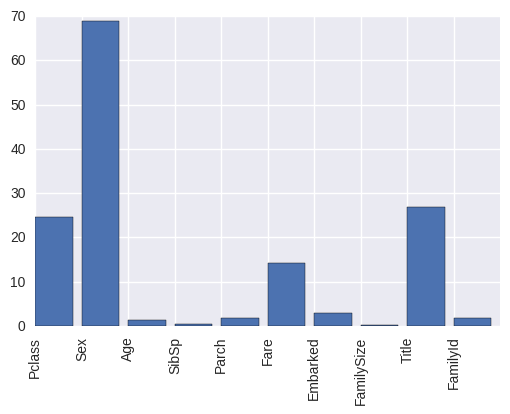

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif , SelectFpr , chi2

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]

selector = SelectKBest(f_classif, k=5) # OK Gives -- predictors = ["Pclass", "Sex", "Title", "Fare"] 

# Trying other Methods ------
#selector = SelectKBest(SelectFpr, k=5) #AttributeError: 'NoneType' object has no attribute 'log10'
#
#
#selector = SelectKBest(chi2, k=5) # Error --- 
# ValueError: Input X must be non-negative.
# Googled --  sklearn.feature_selection chi2 ValueError: Input X must be non-negative. 
# http://stackoverflow.com/questions/25792012/feature-selection-using-scikit-learn


selector.fit(df_harmonized_train[predictors], df_harmonized_train["Survived"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [80]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn import cross_validation
from sklearn.model_selection import cross_val_score    # in place of "cross_validation" try "model_selection" 
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html


#predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"] #> 0.835056689342
#predictors = ["Pclass", "Sex", "Age", "Fare","SibSp"] #> 0.0.835034013605
#predictors = ["Pclass", "Sex", "Title", "Fare"] #> 83.61% # As suggested by - SelectKBest - Score Dropped ?? 
#predictors = ["Pclass", "Sex", "Title", "Age","Fare","SibSp"] #> 83.96%
#predictors = ["Pclass", "Sex", "Age", "Fare"] #> 0.842857142857 = 84.29% 
#predictors = ["Pclass", "Sex", "Title", "Age","Fare","SibSp"] #> 83.85%  ---- 7 JAN 17 

predictors = ["Pclass", "Sex", "Title", "Age","Fare"] #> 84.75%  ---- 7 JAN 17 

alg = RandomForestClassifier(       # Various parameter values passed :- 
    random_state=124,               # 1 , 123 , 124 
    n_estimators=350,               # 350 #> 84.74% , 650 #>84.63%    
    max_features=2,                 # 2 Dont Change 2 is IDEAL , 
    min_samples_split=6,            # 4 , 6  # The Deafult Val = 2
    min_samples_leaf=2,             # 2 , if 4 #> 83.95%
    verbose=0                       # Make it 1 for print in console 
)

                              
#kFold = KFold(df_harmonized_train.shape[0], random_state=124, n_folds=10)
#print(kFold)
#print("_"*90)


scores = cross_val_score(
    alg,                           # ALGORITHM in Cross_val_score Documentation is called - ESTIMATOR
    df_harmonized_train[predictors], # X Array like INDEPENDENT VARIABLES 
    df_harmonized_train["Survived"], # y Array like TARGET or DEPENDENT VARIABLE
    cv=20                            # cv=Default = 3 Fold Cross Validation , we used -18 , 20 #>84.75% 
)                                    # kFold = for n_folds= 22 #>84.40% ,  

print("{0:.2f}%".format(scores.mean() * 100))

84.75%


In [75]:
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn import cross_validation
from sklearn.model_selection import cross_val_score    # in place of "cross_validation" try "model_selection" 
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html


predictors = ["Pclass", "Sex", "Title", "Age","Fare","SibSp", "Parch"] #> 84.62%  ---- 7 JAN 17 

alg = GradientBoostingClassifier(       # Various parameter values passed :- 
    
    random_state=124,
    n_estimators=250,
    max_depth=3     
                          
)

                              
scores = cross_val_score(
    alg,                           # ALGORITHM in Cross_val_score Documentation is called - ESTIMATOR
    df_harmonized_train[predictors], # X Array like INDEPENDENT VARIABLES 
    df_harmonized_train["Survived"], # y Array like TARGET or DEPENDENT VARIABLE
    cv=22                            # cv=Default = 3 Fold Cross Validation , we used -18 , 20 #>84.75% 
)                                    # kFold = for n_folds= 22 #>84.40% ,  

print("{0:.2f}%".format(scores.mean() * 100))

84.62%


In [76]:
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV  

predictors = ["Pclass", "Sex", "Title", "Age","Fare"] #> 84.75%  ---- 7 JAN 17 

algorithms = [
    [GradientBoostingClassifier(random_state=124, n_estimators=250, max_depth=3), predictors],
    [RandomForestClassifier(random_state=124, n_estimators=250,max_features=2,min_samples_split=6,min_samples_leaf=2), predictors]
    
]




'''
#### Original Code --- Gave Error 
#### full_predictions_train --- is Not Defined 

full_predictions = []
full_predictions_test = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(xtrain[predictors], ytrain)  ## DHANK -- FIT ON xTRAIN yTRAIN Created above 
    
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(df_harmonized_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)
    
    predictions_test = alg.predict_proba(xtest[predictors].astype(float))[:,1] ## DHANK -PRED ON xTest Created above 
    full_predictions_test.append(predictions_test)
    

# The gradient boosting classifier generates better predictions, so we weight it higher.
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)


predictions_test = (full_predictions_train[0] * 3 + full_predictions_train[1]) / 4
predictions_test[full_predictions_train[0] <= .5] = 0
predictions_test[full_predictions_train[0] > .5] = 1
#predictions_train = predictions_train.astype(int)
accuracy = sum(predictions_test == ytest) / float(len(predictions_train))
print(accuracy)


submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('titanic2.csv', index=False)

'''

ValueError: Lengths must match to compare

In [83]:
# FINAL SUBMISSION - 7th JAN 
# FINAL SUBMISSION - 7th JAN 
# FINAL SUBMISSION - 7th JAN 
# FINAL SUBMISSION - 7th JAN 



from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV 

predictors_final = ["Pclass", "Sex", "Title", "Age","Fare"] #> 84.75%  ---- 7 JAN 17 

alg = RandomForestClassifier(       # Various parameter values passed :- 
    random_state=124,               # 1 , 123 , 124 
    n_estimators=350,               # 350 #> 84.74% , 650 #>84.63%    
    max_features=2,                 # 2 Dont Change 2 is IDEAL , 
    min_samples_split=6,            # 4 , 6  # The Deafult Val = 2
    min_samples_leaf=2,             # 2 , if 4 #> 83.95%
    verbose=0                       # Make it 1 for print in console 
)


#full_predictions = []
#for alg, predictors in algorithms:
alg.fit(df_harmonized_train[predictors], df_harmonized_train["Survived"])
predictions = alg.predict_proba(df_harmonized_test[predictors].astype(float))[:,1]
#full_predictions.append(predictions)

#predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4

predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0
predictions = predictions.astype(int)

submission = pd.DataFrame({
        "PassengerId": df_harmonized_test["PassengerId"],
                               "Survived": predictions
    })
submission.to_csv('Submission7JAN.csv',index=False)



'''

#full_predictions = []

alg.fit(df_harmonized_train[predictors], df_harmonized_train["Survived"])
predictions = alg.predict_proba(df_harmonized_test[predictors].astype(float))[:,1]
#full_predictions.append(predictions)

#predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4

predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0
predictions = predictions.astype(int)

submission = pd.DataFrame({
        "PassengerId": df_harmonized_test["PassengerId"],
                               "Survived": predictions
    })
submission.to_csv('Submission_Titanic2.csv',index=True)

'''

'\n\n#full_predictions = []\n\nalg.fit(df_harmonized_train[predictors], df_harmonized_train["Survived"])\npredictions = alg.predict_proba(df_harmonized_test[predictors].astype(float))[:,1]\n#full_predictions.append(predictions)\n\n#predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4\n\npredictions[predictions > 0.5] = 1\npredictions[predictions <= 0.5] = 0\npredictions = predictions.astype(int)\n\nsubmission = pd.DataFrame({\n        "PassengerId": df_harmonized_test["PassengerId"],\n                               "Survived": predictions\n    })\nsubmission.to_csv(\'Submission_Titanic2.csv\',index=True)\n\n'

In [ ]:


submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)



In [76]:
# Make predictions using the test set.
predictions = alg.predict(df_harmonized_test[predictors])


NotFittedError: Estimator not fitted, call `fit` before exploiting the model.

In [74]:
submission = pd.DataFrame({
        "PassengerId": df_harmonized_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('Titanic_1.csv', index=False)

NameError: name 'predictions' is not defined

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

predictors = ["Pclass", "Sex", "Title", "Fare"]

alg = RandomForestClassifier(       # Various parameter values passed :- 
    random_state=124,               # 124
    n_estimators=250,               # 250 
    min_samples_split=6,            # 6  
    min_samples_leaf=2              # 2
)

                                    #> 0.842857142857

scores = cross_validation.cross_val_score(
    alg,
    df_harmonized_train[predictors],
    df_harmonized_train["Survived"],
    cv=18                            # 18 Nothing else changed == 
)

print(scores.mean())



KeyError: "['Title'] not in index"

In [9]:
dft = pd.read_csv('train.csv', index_col='PassengerId')
print('Number of rows: {}, Number of columns: {}'.format(*dft.shape))
print ("_"*90)
print(dft.head(5))


Number of rows: 891, Number of columns: 11
__________________________________________________________________________________________
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
Pas

In [10]:
X = pd.DataFrame()
y = train['Survived']

In [11]:
X

""


In [12]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     1
30     0
      ..
862    0
863    1
864    0
865    0
866    1
867    1
868    0
869    0
870    1
871    0
872    1
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    1
881    1
882    0
883    0
884    0
885    0
886    0
887    0
888    1
889    0
890    1
891    0
Name: Survived, dtype: int64